**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (50 points)

Write separate `toolz` pipelines to generate the following variables

- words: a list of all the words in the files `fortune?.txt` in the `data` directory
- reverse_index: a reverse index of words (key=position, value=word)
- index: an index of words (key=word, value=position)
- cat: a list containing the categorical encoding of words

Finally, use `numpy` to convert `cat` into a one-hot matrix with shape (#words, #unique words)

In [23]:
import os
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats

import string
import re

from functools import reduce, partial
import itertools as it
import operator as op
import toolz as tz
import toolz.curried as c

paths = glob.glob(os.path.join('data','fortune?.txt') )
#generate words
words = tz.pipe(
    paths,
    c.map(partial(open, encoding='utf-8')),
    c.map(lambda x: x.read()),
    c.map(lambda x: x.lower()),
    c.map(lambda x: x.translate(str.maketrans('', '', string.punctuation))),
    c.map(lambda x: x.split()),
    tz.concat,
    list
)

In [18]:
unique_words = tz.pipe(
    words,
    tz.unique,
    list
)
reverse_index = tz.pipe(
    unique_words,
    c.map(lambda x: unique_words.index(x)),
    lambda x: zip(x,unique_words),
    dict
)

In [20]:
index = tz.pipe(
    unique_words,
    c.map(lambda x: unique_words.index(x)),
    lambda x: zip(unique_words,x),
    dict
)

In [22]:
cat = tz.pipe(
    words,
    c.map(lambda x: index[x]),
    list
)

In [26]:
#one-hot matrix
n = len(cat)
p = len(index)
m = np.zeros((n,p), dtype='int')
i = np.arange(len(cat))
m[i, cat] = 1
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

**2**. (50 points)

Write a simulation of diffusion-limited aggregation. In this simulation, we have $n$ random walkers. Each walker starts from row 0 and a random column number, and in each step, the walker increases the row number by 1 and randomly increments or decrements its column number by 1. If the column number of the walker exceeds the maximum or becomes negative, the walker emerges on the other side (toroidal boundary conditions). At any time, if any of the walkers 8 neighbors is non-zero, the walker stops in that position, and the number of steps taken is recorded in that (row, column).

Write a function `dla(nwalkers, width, height, seed)` that returns a matrix with shape (width, height) after running `nwalkers` random walks as described above. The argument `ssed` is used to initialize a random number seed. Internally, the function should create a (width, height+1) matrix, and initialize the last row to have 1 with all other entries 0.

Feel free to use loops. This function is not easily vectorized.

Plot the returned matrix for the arguments `nwalkers=10000, width=300, height=150, seed=123`. It should look like this:

![dla](figs/dla.png)

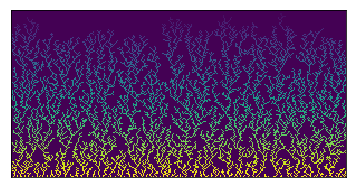

In [78]:
import matplotlib.pyplot as plt
nwalkers=10000
width=300
height=150
seed=123
def neighbor(matrix,i,j):
    x = [-1,0,1]
    y = [-1,0,1]
    for m in x:
        for n in y:
            if(m!=0 or n!=0):                
                if((i+m>=0 and i+m<matrix.shape[0]) and (j+n>=0)and(j+n<matrix.shape[1])):
                    if matrix[i+m,j+n]>0: 
                        return True
    return False
def update(matrix,height,width):
    start = np.random.randint(0,width,1)    
    curr_i = 0
    curr_j = start[0]
    for i in range(1,height+1):
        curr_j = curr_j + np.random.binomial(1,0.5)*2-1
        curr_i = curr_i + 1
        if(curr_j < 0):
            curr_j = width - 1
        elif(curr_j >= width):
            curr_j = 0
        if((i==height) or neighbor(matrix,curr_i,curr_j)):
            matrix[curr_i,curr_j] = i
            break
    return matrix

def dla(nwalkers, width, height, seed):
    np.random.seed(seed)
    matrix = np.zeros((height+1,width),dtype=int)
    for i in range(nwalkers):
        matrix = update(matrix,height,width)
    return matrix[1:,:]
matrix = dla(nwalkers, width, height, seed)
plt.imshow(matrix)
plt.xticks([])
plt.yticks([])
pass

In [79]:
matrix.shape

(150, 300)